In [4]:
from datetime import datetime

import matplotlib.pyplot as plt
import torch
import numpy as np
from pathlib import Path

from utils.settings.config import LINEAR_ENCODER, CROP_ENCODING
num_discrete_labels = len(set(LINEAR_ENCODER.values()))

def starttimer():
    start = datetime.now()
    print(f'{start.strftime("%Y-%m-%d %H:%M:%S")}')
    return start

def endtimer(start):
    end = datetime.now()
    print(f'{end.strftime("%Y-%m-%d %H:%M:%S")}')
    durn = end - start
    print(f'Duration: {durn.total_seconds()}s')
    return end, durn

In [5]:
run_path = "logs/unet/20220807233511/run_20220807233511/"
run_path = Path(run_path)

testrun_path = Path(run_path / f'testrun_{datetime.now().strftime("%Y%m%d_%H%M%S")}')
testrun_path.mkdir(exist_ok=True, parents=True)

In [6]:
confusion_matrix = torch.zeros([num_discrete_labels, num_discrete_labels])
label = torch.randint(11, (833504,), dtype=torch.uint8, device='cuda')
pred = torch.randint(11, (833504,), dtype=torch.uint8, device='cuda')
s = starttimer()
for i in range(label.shape[0]):
    confusion_matrix[label[i], pred[i]] += 1
e,d = endtimer(s)

2022-09-26 10:19:34
2022-09-26 10:23:15
Duration: 221.202257s


In [4]:
confusion_matrix = torch.zeros([num_discrete_labels, num_discrete_labels])
label = torch.randint(11, (833504,), device='cuda')
pred = torch.randint(11, (833504,), device='cuda')
s = starttimer()
for i in range(label.shape[0]):
    confusion_matrix[label[i], pred[i]] += 1
e,d = endtimer(s)

2022-08-25 14:57:27
2022-08-25 15:00:36
Duration: 188.693071s


In [7]:
confusion_matrix = torch.zeros([num_discrete_labels, num_discrete_labels])
label = torch.randint(11, (833504,), dtype=torch.uint8, device='cpu')
pred = torch.randint(11, (833504,), dtype=torch.uint8, device='cpu')
s = starttimer()
for i in range(label.shape[0]):
    confusion_matrix[label[i], pred[i]] += 1
e,d = endtimer(s)

2022-09-26 10:31:03
2022-09-26 10:31:42
Duration: 38.283515s


In [8]:
confusion_matrix = np.zeros([num_discrete_labels, num_discrete_labels])
label = torch.randint(11, (833504,), device='cpu')
pred = torch.randint(11, (833504,), device='cpu')
s = starttimer()
for i in range(label.shape[0]):
    confusion_matrix[label[i], pred[i]] += 1
e,d = endtimer(s)

2022-09-26 10:31:46
2022-09-26 10:31:51
Duration: 4.961683s


In [9]:
confusion_matrix = np.zeros([num_discrete_labels, num_discrete_labels])
label = torch.randint(11, (224,61,61,)).cpu().detach().numpy().flatten()
pred = torch.randint(11, (224,61,61,)).cpu().detach().numpy().flatten()
s = starttimer()
for i in range(label.shape[0]):
    confusion_matrix[label[i], pred[i]] += 1
e,d = endtimer(s)

2022-09-26 10:31:56
2022-09-26 10:31:56
Duration: 0.447493s


In [63]:
from sklearn.metrics import confusion_matrix
cm = np.zeros([num_discrete_labels-1, num_discrete_labels-1])

label = torch.randint(11, (1000,36,61,61,)).flatten().cpu().detach() # 7518,36,61,61 simulates full Test data set
pred = torch.randint(11, (1000,36,61,61,)).flatten().cpu().detach()

s = starttimer()
cm_delta = confusion_matrix(label, pred)
cm = cm + cm_delta
e,d = endtimer(s)

2022-09-26 11:49:37
2022-09-26 11:50:00
Duration: 23.642587s


In [30]:
s = starttimer()
from torchmetrics.functional import dice

dice_score = []
for i in range(10):
    label = torch.randint(12, (224,61,61,)).flatten().cpu().detach()
    pred = torch.randint(12, (224,61,61,)).flatten().cpu().detach()
    step_dice_score = dice(pred, label, num_classes=12, multiclass=True, zero_division=1, ignore_index=0, average='none')
    dice_score.append(step_dice_score.numpy())

dice_score = np.array(dice_score)
dice_score = dice_score[:,1:] # Drop zero label

print(f"Dice Score\n{dice_score}")
print(np.average(dice_score, axis=0))
e,d = endtimer(s)

2022-09-26 10:44:13
Dice Score
[[0.08383165 0.08240922 0.08277836 0.08363689 0.08251145 0.08347472
  0.08494559 0.08518633 0.08485659 0.08429696 0.0824891 ]
 [0.08218408 0.08335079 0.08482568 0.08348637 0.08308695 0.08420704
  0.08504775 0.08525208 0.08329311 0.08313661 0.08550039]
 [0.08239652 0.08383191 0.0822069  0.08238003 0.08179989 0.08309905
  0.08319451 0.08201538 0.08286274 0.08465024 0.08333573]
 [0.08253236 0.08378161 0.08434866 0.08289325 0.08269268 0.08505733
  0.0832015  0.08353355 0.08528806 0.08379415 0.08301011]
 [0.08390438 0.08431403 0.08396195 0.08470423 0.083674   0.08338628
  0.0833195  0.08249191 0.08298318 0.083721   0.08311424]
 [0.08358059 0.08275107 0.08202173 0.08312884 0.0830785  0.08414258
  0.08307739 0.0824483  0.08285476 0.08149543 0.08398772]
 [0.08526614 0.08359279 0.08374427 0.08384442 0.08417688 0.08352812
  0.08269089 0.08331834 0.08486508 0.08414015 0.08401791]
 [0.08389583 0.08372791 0.08215711 0.0823996  0.08374833 0.0815921
  0.08414765 0.08546

### Test normalisation of confusion matrix

In [65]:
# Normalize each row of the confusion matrix because class imbalance is
# high and visualization is difficult
row_mins = cm.min(axis=1)
row_maxs = cm.max(axis=1)
row_range = row_maxs - row_mins

print(f"row_maxs={row_maxs}")
print(f"row_mins={row_mins}")
print(f"row_range={row_range}")

print(f"row_range[:, None]\n{row_range[:, None]}")
print(f"row_mins[:, None]\n{row_mins[:, None]}")

row_maxs=[1108573. 1108086. 1108050. 1109155. 1109198. 1108114. 1109469. 1108785.
 1108674. 1108828. 1108518.]
row_mins=[1104440. 1104601. 1104652. 1104860. 1104806. 1105178. 1105927. 1105057.
 1106078. 1103656. 1105399.]
row_range=[4133. 3485. 3398. 4295. 4392. 2936. 3542. 3728. 2596. 5172. 3119.]
row_range[:, None]
[[4133.]
 [3485.]
 [3398.]
 [4295.]
 [4392.]
 [2936.]
 [3542.]
 [3728.]
 [2596.]
 [5172.]
 [3119.]]
row_mins[:, None]
[[1104440.]
 [1104601.]
 [1104652.]
 [1104860.]
 [1104806.]
 [1105178.]
 [1105927.]
 [1105057.]
 [1106078.]
 [1103656.]
 [1105399.]]


In [66]:
cm_norm =  (cm - row_mins[:, None]) / row_range[:, None]
print(f"cm_norm\n{cm_norm}")
# Replace invalid values with 0
cm_norm = np.nan_to_num(cm_norm, nan=0.0, posinf=0.0, neginf=0.0)

cm_norm
[[0.49286233 0.         0.1693685  0.59859666 0.44495524 1.
  0.28115171 0.68134527 0.57415921 0.67481248 0.779579  ]
 [1.         0.8938307  0.44591105 0.82496413 0.11621234 0.75408895
  0.71162123 0.91678623 0.         0.86484935 0.97991392]
 [0.81165391 0.68981754 0.45438493 1.         0.36815774 0.91701001
  0.45585639 0.87021778 0.82607416 0.96909947 0.        ]
 [0.60186263 0.28335274 0.63445867 0.68125728 1.         0.
  0.43329453 0.91501746 0.43562282 0.66589057 0.5145518 ]
 [0.59039162 0.58834244 0.53392532 0.08310565 0.96789617 0.55532787
  1.         0.68920765 0.         0.21083789 0.40300546]
 [0.3136921  0.22445504 0.         0.72309264 0.75340599 0.74625341
  0.93051771 0.5653951  0.94550409 1.         0.66927793]
 [0.65556183 0.66798419 0.50479955 0.77498588 0.93506494 0.66939582
  1.         0.29136081 0.         0.32213439 0.50451722]
 [0.70171674 0.4820279  1.         0.42945279 0.33744635 0.
  0.57162017 0.99248927 0.08074034 0.44152361 0.1888412 ]
 [0.5989

In [67]:
cm_rowtotal = cm.sum(axis=1)
cm_pct =  cm / cm_rowtotal[:, None]
print(f"cm_pct\n{cm_pct}")
# Replace invalid values with 0
cm_pct = np.nan_to_num(cm_pct, nan=0.0, posinf=0.0, neginf=0.0)

cm_pct
[[0.09090059 0.09073325 0.09079075 0.09093649 0.09088433 0.09107278
  0.09082871 0.09096459 0.0909282  0.09096237 0.09099794]
 [0.09099994 0.09096956 0.09084136 0.09094985 0.090747   0.09092956
  0.09091741 0.09097613 0.09071374 0.09096126 0.09099419]
 [0.09094882 0.09091482 0.09084912 0.09100138 0.09082505 0.09097822
  0.09084953 0.09096516 0.09095284 0.09099276 0.09072231]
 [0.09092368 0.09081137 0.09093518 0.09095168 0.09106408 0.09071145
  0.09086424 0.09103411 0.09086506 0.09094626 0.09089289]
 [0.09093769 0.09093695 0.09091733 0.09075473 0.09107384 0.09092504
  0.09108542 0.09097333 0.09072476 0.0908008  0.09087011]
 [0.09083411 0.09081259 0.09075847 0.09093282 0.09094013 0.0909384
  0.09098283 0.09089479 0.09098644 0.09099958 0.09091984]
 [0.09093248 0.09093609 0.09088867 0.09096719 0.09101371 0.0909365
  0.09103258 0.09082664 0.09074196 0.09083558 0.09088859]
 [0.09097849 0.09091122 0.09106982 0.09089512 0.09086695 0.09076362
  0.09093865 0.09106752 0.09078835 0.09089882

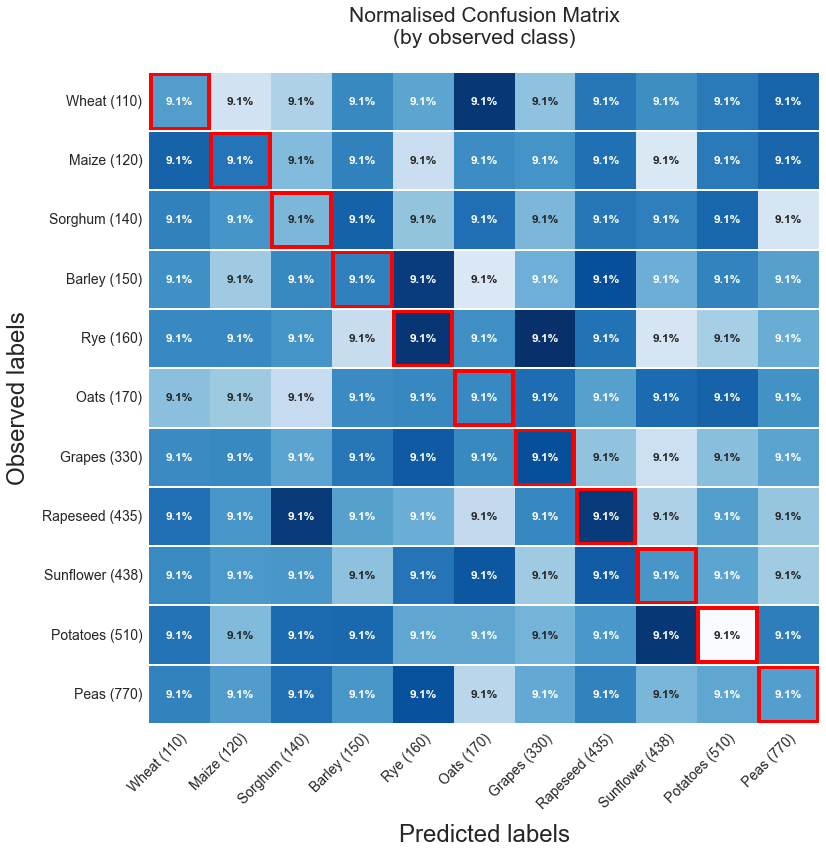

In [105]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

crop_encoding_rev = {v: k for k, v in CROP_ENCODING.items()}
crop_encoding = {k: crop_encoding_rev[k] for k in LINEAR_ENCODER.keys() if k != 0}
crop_encoding[0] = 'Background/Other'

# Create plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
#sns.heatmap(cm_norm, annot=True, ax=ax, cmap="Blues", fmt=".3f", annot_kws={'fontsize': 12})
#sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt=".0f", annot_kws={'fontsize': 10})
sns.heatmap(cm_pct, annot=True, ax=ax, cmap="Blues", fmt=".1%", annot_kws={'fontsize': 12, 'weight': 'bold'}, cbar=False)

# Labels, title and ticks
label_font = {'size': '24'}
ax.set_xlabel('Predicted labels', fontdict=label_font, labelpad=12)
ax.set_ylabel('Observed labels', fontdict=label_font, labelpad=12)

ax.set_xticks(list(np.arange(0.5, len(LINEAR_ENCODER.keys()) - 1 + 0.5)))
ax.set_yticks(list(np.arange(0.5, len(LINEAR_ENCODER.keys()) - 1 + 0.5)))

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.set_xticklabels([f'{crop_encoding[k]} ({k})' for k in sorted(LINEAR_ENCODER.keys()) if k != 0],
                   fontsize=14, rotation=45, ha='right', rotation_mode='anchor') # rotation='vertical'
ax.set_yticklabels([f'{crop_encoding[k]} ({k})' for k in sorted(LINEAR_ENCODER.keys()) if k != 0],
                   fontsize=14, rotation='horizontal')

ax.tick_params(axis='both', which='major')

title_font = {'size': '21'}
ax.set_title('Normalised Confusion Matrix\n(by observed class)\n', fontdict=title_font)

# For Percent CM
for i in range(len(LINEAR_ENCODER.keys())):
    ax.axhline(i, color="white", lw=2)

for i in range(len(LINEAR_ENCODER.keys()) - 1):
    ax.add_patch(Rectangle((i+0.02, i+0.04), 0.96, 0.92, fill=False, edgecolor='red', lw=4))



plt.show()


## Calculate Embedded Dimensions from number of layers and input dimensions

In [47]:
tile_dim = 366
num_patches = 6
num_layers = 4
num_heads = 1

output_dim = img_dim = int(tile_dim/num_patches)
print(f"Input Dimension: [{img_dim} x {img_dim}]")
for i in range(num_layers-1):    output_dim = output_dim // 2

embed_dim = output_dim*output_dim # dimension of pixel grad in final downsample layer
print(f"Embedded Dimensions: [{output_dim} x {output_dim}] = {embed_dim} ")

# Validate that embedded dimensions can be split evenly across number of heads
head_dim = embed_dim // num_heads
assert head_dim * num_heads == embed_dim, "embed_dim must be divisible by num_heads"
print(f"Number of Heads: {num_heads} | Embedded Dimensions per Head: {head_dim}")

Input Dimension: [61 x 61]
Embedded Dimensions: [7 x 7] = 49 
Number of Heads: 1 | Embedded Dimensions per Head: 49


In [42]:
mhsa = False
mhca = True
if mhsa and not mhca:
    text = "U-Net with MHSA only"
elif mhca and not mhsa:
    text = "U-Net with MHCA only"
else:
    text = "U-Net Transformer (U-Net with MHSA and MHCA)"
print(text)


U-Net Transformer (U-Net with MHSA and MHCA)
